# Data Science Final Project

# Introduction

In this project, I aim to further the analysis for my arts and jobs paper. The overall research question is: what drives growth, jobs or amenities? Do people follow jobs or amenities or both? 

Using regression analysis in the previous paper, I found that arts are drivers of growth. However, it is stronger in some places than others; for example, in more populated areas, or areas with more college graduates. But what really are the underelying variables that would distinguish the influence of the arts in one places than in others? What variables would be more relevant in the jobs and amenities to explain growth? In other words, why are arts where they are?

With over 50 control variables available, I would like to know which ones would help describe the changes better than only the main regression variables. And here I use some methods to see what variables could explain the impact of the arts on the growth of jobs. 

In [43]:
%matplotlib inline
from collections import Counter
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans, DBSCAN

# The Data

The main data show the number of arts and non-arts jobs per zip code. The data is from the County Business Patterns, from the Census, and data ranges from 1998 to 2014. 

In [44]:
#Loading the datafile. This is just a sample of the data. N=500
df = pd.read_csv("nomiss_sample.csv")

In [45]:
# Dropping excessive variables
df.drop(['pctba90', 'racediversity90', 'medrent90', 'medhhinc90', 'meantrav90', 'meanlengthres90', 'pctsamehouse90',
'pctfemale90', 'pctmarried90', 'pctchild90', 'pctunemp90', 'diversityanc90', 'pctrental90', 'pctpov90', 'pctbike90',
'pctdrove90', 'pctwalk90', 'density1990', 'housingdensity1990', 'Pop1990', 'Unnamed: 0','JobsT_1998', 'ArtsW_1998', 'JobsW_1998', 
'ArtSupport_1998', 'JobsT_1999', 'ArtsW_1999', 'JobsW_1999', 'ArtSupport_1999', 'JobsT_2000', 'ArtsW_2000', 'JobsW_2000',
 'ArtSupport_2000', 'JobsT_2001', 'ArtsW_2001', 'JobsW_2001', 'ArtSupport_2001', 'JobsT_2002', 'ArtsW_2002', 'JobsW_2002',
 'ArtSupport_2002', 'JobsT_2003', 'ArtsW_2003', 'JobsW_2003', 'ArtSupport_2003', 'JobsT_2004', 'ArtsW_2004', 'JobsW_2004',
 'ArtSupport_2004', 'JobsT_2005', 'ArtsW_2005', 'JobsW_2005', 'ArtSupport_2005', 'JobsT_2006', 'ArtsW_2006', 'JobsW_2006',
 'ArtSupport_2006', 'JobsT_2007', 'ArtsW_2007', 'JobsW_2007', 'ArtSupport_2007', 'JobsT_2008', 'ArtsW_2008', 'JobsW_2008',
 'ArtSupport_2008', 'JobsT_2009', 'ArtsW_2009', 'JobsW_2009', 'ArtSupport_2009', 'JobsT_2010', 'ArtsW_2010', 'JobsW_2010',
 'ArtSupport_2010', 'JobsT_2011', 'ArtsW_2011', 'JobsW_2011', 'ArtSupport_2011', 'JobsT_2012', 'ArtsW_2012', 'JobsW_2012',
 'ArtSupport_2012', 'JobsT_2013', 'ArtsW_2013', 'JobsW_2013', 'ArtSupport_2013', 'JobsT_2014', 'ArtsW_2014',
 'JobsW_2014', 'ArtSupport_2014', 'ARTGOSLG98', 'City', 'State', 'Location', 'zipcode'], axis=1, inplace=True)

In [46]:
#Listing the variables in the data.b
list(df.columns.values)

['zip',
 'ArtsN_1998',
 'JobsN_1998',
 'ArtsN_1999',
 'JobsN_1999',
 'ArtsN_2000',
 'JobsN_2000',
 'ArtsN_2001',
 'JobsN_2001',
 'ArtsN_2002',
 'JobsN_2002',
 'ArtsN_2003',
 'JobsN_2003',
 'ArtsN_2004',
 'JobsN_2004',
 'ArtsN_2005',
 'JobsN_2005',
 'ArtsN_2006',
 'JobsN_2006',
 'ArtsN_2007',
 'JobsN_2007',
 'ArtsN_2008',
 'JobsN_2008',
 'ArtsN_2009',
 'JobsN_2009',
 'ArtsN_2010',
 'JobsN_2010',
 'ArtsN_2011',
 'JobsN_2011',
 'ArtsN_2012',
 'JobsN_2012',
 'ArtsN_2013',
 'JobsN_2013',
 'ArtsN_2014',
 'JobsN_2014',
 'MedAge2k',
 'pctba2k',
 'racediversity2k',
 'medrent2k',
 'medhhinc2k',
 'meantrav2k',
 'medlengthres2k',
 'pctsamehouse2k',
 'pctfemale2k',
 'pctmarried2k',
 'pctchild2k',
 'pctunemp2k',
 'diversityfb2k',
 'pctrental2k',
 'pctpov2k',
 'pctbike2k',
 'pctdrove2k',
 'pctwalk2k',
 'density2000',
 'housingdensity2000',
 'Pop2000',
 'RentMed',
 'Democ92',
 'NonWhite_90',
 'CollProfLv90',
 'CrimeRate1999county',
 'Traditionalistic',
 'Self_Expressive',
 'Utilitarian',
 'Charismatic

In [47]:
#Number of observations, number of variables
df.shape

(500, 76)

### Variables

Below is the description of the 2014 variables for the arts and non-arts jobs. 

In [48]:
df.describe()

,zip,ArtsN_1998,JobsN_1998,ArtsN_1999,JobsN_1999,ArtsN_2000,JobsN_2000,ArtsN_2001,JobsN_2001,ArtsN_2002,...,Neighborly,Formality,Exhibitionism,Glamorous,Transgressive,Rational,Locality,State_Scenes,Corporateness,Ethnicity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,42583.684000,150.830000,8940.380000,160.466000,9186.372000,167.50600,9387.514000,174.880000,9478.936000,156.222000,...,416.261428,428.190351,425.885760,422.153434,380.971538,406.706685,412.728461,408.390568,432.219519,408.493403
std,27367.141769,323.254804,9304.431677,342.380288,9650.718247,348.97262,9903.400697,374.091473,10144.184508,305.716112,...,360.998430,373.947893,370.575748,369.627462,333.706941,354.157323,358.124086,356.844095,379.424845,355.585790
min,1013.000000,3.000000,3.000000,3.000000,3.000000,3.00000,0.000000,3.000000,0.000000,3.000000,...,3.000000,3.000000,3.250000,3.000000,2.750000,3.000000,3.250000,3.000000,3.000000,3.000000
25%,19117.750000,18.000000,2244.500000,19.000000,2293.250000,19.00000,2319.000000,21.000000,2356.250000,16.000000,...,157.591482,160.247997,160.513941,156.401442,142.726157,154.257560,157.562317,154.322140,160.095709,154.951172
50%,37897.000000,57.000000,6045.500000,60.000000,6091.500000,67.50000,6141.500000,66.500000,6280.000000,61.000000,...,314.161683,325.698861,322.408153,319.159864,287.851017,308.450483,314.277590,307.687775,326.498743,306.780798
75%,65377.000000,149.000000,12168.500000,158.000000,12656.250000,171.00000,13150.750000,175.250000,12867.250000,171.500000,...,579.726789,592.038651,588.692797,586.211349,530.333984,563.734064,570.901549,565.753714,597.548034,566.166667
max,94041.000000,3375.000000,60042.000000,3383.000000,60907.000000,3431.00000,66534.000000,4312.000000,76758.000000,2784.000000,...,2606.951389,2696.743056,2666.812500,2671.302083,2417.640625,2571.034722,2588.244792,2583.755208,2740.890625,2581.510417


Some of the main control variables are listed below. The first table shows the core variables, which are from Prof. Clark's Scenes Project. 


| Variable | Description  |
|------|------|
| Pop2000 | Population in 2000 |
| CrimeRate1999county | Crime Rate in 1999 | 
| Democ92 | Percent Democrats | 
| RentMed | Median Rent | 
| NonWhite_90 | Percent non white population in 1990 |
| CollProfLv90 | Percent college graduates in 1990 |

In [49]:
# Describing the variables
df[['Pop2000', 'CrimeRate1999county', 'Democ92', 'RentMed', 'NonWhite_90', 'CollProfLv90']].describe()

,Pop2000,CrimeRate1999county,Democ92,RentMed,NonWhite_90,CollProfLv90
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,19636.284000,4172.196000,41.663600,445.226000,3123.410000,0.227264
std,14427.529156,2113.478098,9.440388,131.011614,5221.593264,0.137318
min,169.000000,151.000000,17.100000,199.000000,0.000000,0.031375
25%,7965.250000,2522.750000,35.500000,345.750000,177.750000,0.125387
50%,16361.000000,3695.000000,40.300000,424.000000,997.000000,0.184616
75%,27855.250000,5653.000000,47.000000,522.000000,3429.750000,0.291245
max,74948.000000,9834.000000,84.600000,834.000000,38284.000000,0.753073


The table below shows the Scenes variables, which are decoded into 15 dimensions. These variables were made by coders, who gave a score from 1 to 5 on each dimension based on the type of neighborhood (zip code), and them summed. The coders followed a series of guidelines, but mostly trying to answer the question: does an amenity’s vitality and energy comes from the way it embodies this sub-category? Coding whether an amenity positively or negatively indicated the concrete presence of the sub-category.

The INT variables mean "intensity"; the AP variables mean "amenities performance". The DP variables are overall performance measures. 

I focus on the amenities performance (AP) variables. 

| Scenes Dimension | Type | Measurement Level | Description (Values) | 
|------|------|
 | Traditionalistic | Numeric | Scale | Appeals to heritage and the past | 
 | Self_expressive | Numeric | Scale | Unique, personal, expression | 
| Utilitarian | Numeric | Scale | Usefulness of its amenities | 
| Charismatic | Numeric | Scale | In the presence of an exceptional personality | 
 | Egalitarian | Numeric | Scale | Universal equality, treating others non-strategically |
 | Neighborly | Numeric | Scale | Closeness, personal networks, face-to-face interactions | 
 | Formality | Numeric | Scale | Fitting into established patterns of social etiquette |
| Exhibitionism | Numeric | Scale | Encourage looking at others and being looked by them in turn |
 | Glamorous | Numeric | Scale | Charm, allure, star power, status | 
 | Transgressive | Numeric | Scale | Revel in shocking others and associating with equally shocking others |
 | Rational | Numeric | Scale | Power to choose one's own fate (organic or planned growth)| 
| Locality | Numeric | Scale | Feeling rooted in a place | 
| State | Numeric | Scale | Role of the State in shaping one's identity | 
 | Corporateness | Numeric | Scale | Corporations as social power that shape identity | 
 | Ethnicity | Numeric | Scale | Shape of pre-reflective identity | 

In [50]:
df[['Traditionalistic','Self_Expressive', 'Utilitarian', 'Charismatic', 'Egalitarian', 'Neighborly', 'Formality',
'Exhibitionism', 'Glamorous', 'Transgressive', 'Rational', 'Locality', 'State_Scenes', 'Corporateness', 'Ethnicity']].describe()

,Traditionalistic,Self_Expressive,Utilitarian,Charismatic,Egalitarian,Neighborly,Formality,Exhibitionism,Glamorous,Transgressive,Rational,Locality,State_Scenes,Corporateness,Ethnicity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,417.377171,434.301216,392.292006,437.808753,418.064375,416.261428,428.190351,425.885760,422.153434,380.971538,406.706685,412.728461,408.390568,432.219519,408.493403
std,363.143478,382.261930,343.281785,385.144623,363.300658,360.998430,373.947893,370.575748,369.627462,333.706941,354.157323,358.124086,356.844095,379.424845,355.585790
min,3.250000,3.000000,2.500000,3.000000,3.000000,3.000000,3.000000,3.250000,3.000000,2.750000,3.000000,3.250000,3.000000,3.000000,3.000000
25%,156.508065,161.685847,145.027920,163.102697,158.646925,157.591482,160.247997,160.513941,156.401442,142.726157,154.257560,157.562317,154.322140,160.095709,154.951172
50%,315.884978,325.950581,297.807432,331.497271,318.198931,314.161683,325.698861,322.408153,319.159864,287.851017,308.450483,314.277590,307.687775,326.498743,306.780798
75%,576.197917,602.285330,542.777123,611.772682,581.017506,579.726789,592.038651,588.692797,586.211349,530.333984,563.734064,570.901549,565.753714,597.548034,566.166667
max,2615.182292,2756.604167,2498.453125,2792.520833,2615.182292,2606.951389,2696.743056,2666.812500,2671.302083,2417.640625,2571.034722,2588.244792,2583.755208,2740.890625,2581.510417


Other variables of interest are from the Geolytics database, also in the zip code level. Some variables are described in the table below. 

| Variable | Type | Measurement Level | Description  | 
|------|------|
| pctba2k  | Numeric | Scale | Percent Graduated Bachelor Degree in 2000 |
| pctrental2k | Numeric | Scale | Percent Rentals in 2000 | 
| pctmarried2k | Numeric | Scale | Percent of population 15 years and older, married, 2000 | 
| pctchild2k | Numeric | Scale | Percentage of households with children 0-17, 2000 | 
| racediversity2k | Numeric | Scale | Racial diversity index, 2000 |
| medrent2k | Numeric | Scale | Median Gross Rent, 2000 | 
| medhhinc2k | Numeric | Scale | Median Household Income, 2000 |
| meantrav2k | Numeric | Scale | Mean travel time to work in minutes, 2000 |
| medlengthres2k | Numeric | Scale | Median length of residence in housing unit, 2000 |
| pctsamehouse2k | Numeric | Scale | Percentage living in same house, from 1995 to 2000 |
| pctfemale2k | Numeric | Scale | Percentage female, 2000 | 
| pctunemp2k | Numeric | Scale | Percentage of unemployed labor force, 2000 |
| diversityfb2k | Numeric | Scale | Foreign born diversity index, 2000 |
| pctpov2k | Numeric | Scale | Percentage population below poverty level, 2000 |
| pctwalk2k | Numeric | Scale | Percent of people who walk in 2000 | 
| pctbike2k | Numeric | Scale | Percentage biked to work, 2000 |
| pctdrove2k | Numeric | Scale | Percentage drove to work, 2000 |
| density2000 | Numeric | Scale | Population density, 2000 |
| housingdensity2000 | Numeric | Scale | Housing density, 2000 |

In [51]:
df[['pctba2k', 'pctrental2k', 'pctmarried2k', 'pctwalk2k', 'pctchild2k']].describe()

,pctba2k,pctrental2k,pctmarried2k,pctwalk2k,pctchild2k
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,26.909316,30.812538,57.934490,2.806996,32.991680
std,15.625101,16.516941,8.762532,4.169013,7.813197
min,3.491858,1.749781,26.544868,0.000000,4.219409
25%,14.615629,20.080954,52.874223,1.005617,28.356874
50%,22.620498,27.171007,59.766381,1.788778,32.748370
75%,36.713185,37.722073,63.815563,3.320211,37.598388
max,89.264582,93.349726,78.486029,61.007958,59.903148


### Creating a change variables for the arts

In [52]:
df['arts_change'] = df['ArtsN_2014'] - df['ArtsN_1998']

## Plots

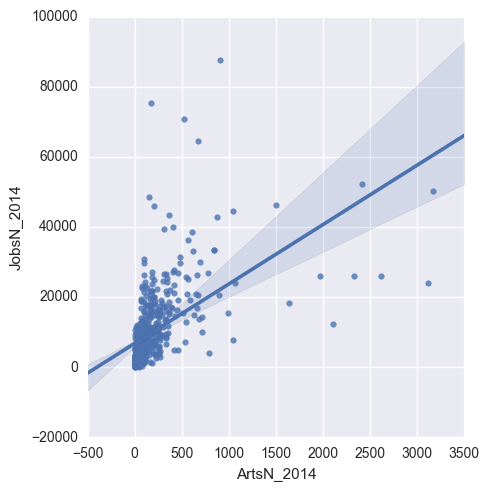

In [53]:
sns.lmplot(x="ArtsN_2014", y="JobsN_2014", data=df)
sns.plt.show()

# Models

Differently from the analysis on the paper, in this project, the research question is: why are arts where they are? What makes some places more attractive for the arts than others?

1. Simplest regression model
2. Cross validation
3. Decision trees
4. Random forest
5. Cluster Analysis
6. Autocorrelation
7. Time Series

## Simplest Regression Model

In [54]:
# Using sklearn to run the simple regression model with education
# Does education have any influence in the growth of arts?

from sklearn import linear_model

X = df[["JobsN_1998", "ArtsN_1998", "CollProfLv90"]]
X = sm.add_constant(X)
y = df["ArtsN_2014"]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             ArtsN_2014   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     214.3
Date:                Tue, 22 Nov 2016   Prob (F-statistic):           4.04e-89
Time:                        00:28:49   Log-Likelihood:                -3434.3
No. Observations:                 500   AIC:                             6877.
Df Residuals:                     496   BIC:                             6893.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          -59.4785     21.761     -2.733   

Since all three independent variables are significant, we can assume that education, non-arts jobs, and the arts had an impact in the growth of arts; with education having the highest impact of all three.

## Cross Validation

In [55]:
# Defining variables
X = df[["JobsN_1998", "ArtsN_1998", "CollProfLv90", "CrimeRate1999county", "Democ92", "RentMed", "NonWhite_90"]]
y = df["ArtsN_2014"]

In [56]:
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             ArtsN_2014   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     138.5
Date:                Tue, 22 Nov 2016   Prob (F-statistic):          3.91e-112
Time:                        00:28:50   Log-Likelihood:                -3432.8
No. Observations:                 500   AIC:                             6880.
Df Residuals:                     493   BIC:                             6909.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
JobsN_1998              0.0074    

Setting up the cross-validation method for 5 folds, on the data with the core variables.

In [57]:
from sklearn import cross_validation
kf = cross_validation.KFold(len(df), n_folds=5, shuffle=True)

In [58]:
mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(X.iloc[test_index])))
    scores.append(lm.score(X, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 28219.834449
R2: 0.565957413613
Model 2
MSE: 116561.923975
R2: 0.527501410697
Model 3
MSE: 63816.323774
R2: 0.56431619778
Model 4
MSE: 84257.4960296
R2: 0.559128653788
Model 5
MSE: 35173.1943794
R2: 0.565053577654
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 65605.7545214
Mean of R2 for all folds: 0.556391450706


## Models with Scenes Dimensions

In [59]:
#Dependent variable is arts: how did jobs and the other variables influence the growth of arts?
#Using sklearn to run the regression model with all the Scenes dimensions

from sklearn import linear_model

X = df[["JobsN_1998", "ArtsN_1998", 'Traditionalistic','Self_Expressive', 'Utilitarian', 'Charismatic', 'Egalitarian', 
        'Neighborly', 'Formality','Exhibitionism', 'Glamorous', 'Transgressive', 'Rational', 'Locality', 'State_Scenes', 
        'Corporateness', 'Ethnicity']]
X = sm.add_constant(X)
y = df["ArtsN_2014"]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             ArtsN_2014   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     51.10
Date:                Tue, 22 Nov 2016   Prob (F-statistic):           3.11e-96
Time:                        00:28:50   Log-Likelihood:                -3384.5
No. Observations:                 500   AIC:                             6805.
Df Residuals:                     482   BIC:                             6881.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const              -43.2552     20.117  

In [60]:
#Dependent variable is jobs: how did jobs and the other variables influence the growth of jobs?
#Using sklearn to run the regression model with all the Scenes dimensions

from sklearn import linear_model

X = df[['JobsN_1998', 'ArtsN_1998', 'Traditionalistic','Self_Expressive', 'Utilitarian', 'Charismatic', 'Egalitarian', 
        'Neighborly', 'Formality','Exhibitionism', 'Glamorous', 'Transgressive', 'Rational', 'Locality', 'State_Scenes', 
        'Corporateness', 'Ethnicity']]
X = sm.add_constant(X)
y = df["JobsN_2014"]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             JobsN_2014   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     196.8
Date:                Tue, 22 Nov 2016   Prob (F-statistic):          3.06e-204
Time:                        00:28:50   Log-Likelihood:                -4845.3
No. Observations:                 500   AIC:                             9727.
Df Residuals:                     482   BIC:                             9803.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const              925.0486    373.649  

## Decision Trees

### Only Scenes variables

Defining variables

In [61]:
X = df[['Traditionalistic','Self_Expressive', 'Utilitarian', 'Charismatic', 'Egalitarian', 
        'Neighborly', 'Formality','Exhibitionism', 'Glamorous', 'Transgressive', 'Rational', 'Locality', 'State_Scenes', 
        'Corporateness', 'Ethnicity']]

In [62]:
y = df['ArtsN_2014']

dt = DecisionTreeClassifier(criterion='entropy', 
                           random_state=4)
dt.fit(X, y)

dt.feature_importances_

# Put the feature importances in a list
feature_importances_array = dt.feature_importances_

# Put the features themselves in a list
features_array = X.columns.values 

# Turn these into a Data Frame
feature_importances_df = pd.DataFrame({'importances' : feature_importances_array,
                                       'features' : features_array})

# Sort the feature importances highest to lowest
feature_importances_df.sort(columns='importances',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
7,Exhibitionism,0.144530
4,Egalitarian,0.093471
11,Locality,0.086977
5,Neighborly,0.085997
13,Corporateness,0.085839
1,Self_Expressive,0.069304
2,Utilitarian,0.067724
8,Glamorous,0.060852
6,Formality,0.051354
9,Transgressive,0.050129


In [63]:
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file='tree5.dot')

### More variables

In [64]:
X = df[['MedAge2k','pctba2k', 'racediversity2k', 'medrent2k', 'medhhinc2k', 'meantrav2k',
        'pctsamehouse2k', 'pctfemale2k', 'pctmarried2k', 'pctchild2k', 'pctunemp2k', 'diversityfb2k', 
        'pctrental2k', 'pctpov2k', 'pctbike2k', 'pctdrove2k', 'pctwalk2k', 'density2000', 'housingdensity2000', 'Pop2000',
        'RentMed', 'Democ92', 'NonWhite_90', 'CollProfLv90', 'CrimeRate1999county']]

In [ ]:
y = df['arts_change']

dt = DecisionTreeClassifier(criterion='entropy', 
                           random_state=4)
dt.fit(X, y)

dt.feature_importances_

# Put the feature importances in a list
feature_importances_array = dt.feature_importances_

# Put the features themselves in a list
features_array = X.columns.values 

# Turn these into a Data Frame
feature_importances_df = pd.DataFrame({'importances' : feature_importances_array,
                                       'features' : features_array})

# Sort the feature importances highest to lowest
feature_importances_df.sort(columns='importances',ascending=False)

In [66]:
# Get the cross validated accuracy score for each of three cross validation folds
dt_scores = cross_val_score(dt, X, y)

# Take the mean of these scores
round(dt_scores.mean(), 5)

0.02805

### Arts and jobs variables

In [67]:
X = df[[ 'ArtsN_1998', 'JobsN_1998', 'ArtsN_1999', 'JobsN_1999', 'ArtsN_2000', 'JobsN_2000', 'ArtsN_2001', 'JobsN_2001',
 'ArtsN_2002', 'JobsN_2002', 'ArtsN_2003', 'JobsN_2003', 'ArtsN_2004', 'JobsN_2004', 'ArtsN_2005', 'JobsN_2005',
 'ArtsN_2006', 'JobsN_2006', 'ArtsN_2007', 'JobsN_2007', 'ArtsN_2008', 'JobsN_2008', 'ArtsN_2009', 'JobsN_2009',
 'ArtsN_2010', 'JobsN_2010', 'ArtsN_2011', 'JobsN_2011', 'ArtsN_2012', 'JobsN_2012', 'ArtsN_2013', 'JobsN_2013']]

In [68]:
y = df['arts_change']

dt = DecisionTreeClassifier(criterion='entropy', 
                           random_state=4)
dt.fit(X, y)

dt.feature_importances_

# Put the feature importances in a list
feature_importances_array = dt.feature_importances_

# Put the features themselves in a list
features_array = X.columns.values 

# Turn these into a Data Frame
feature_importances_df = pd.DataFrame({'importances' : feature_importances_array,
                                       'features' : features_array})

# Sort the feature importances highest to lowest
feature_importances_df.sort(columns='importances',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
26,ArtsN_2011,0.150489
30,ArtsN_2013,0.104256
28,ArtsN_2012,0.082838
0,ArtsN_1998,0.080889
6,ArtsN_2001,0.071213
2,ArtsN_1999,0.064168
8,ArtsN_2002,0.038265
18,ArtsN_2007,0.035643
1,JobsN_1998,0.031035
4,ArtsN_2000,0.028627


## Random Forest

In [69]:
X = df[['Traditionalistic','Self_Expressive', 'Utilitarian', 'Charismatic', 'Egalitarian', 
        'Neighborly', 'Formality','Exhibitionism', 'Glamorous', 'Transgressive', 'Rational', 'Locality', 'State_Scenes', 
        'Corporateness', 'Ethnicity']]
y = df['ArtsN_2014']

In [70]:
# Initialize a LogisticRegression object (one line below):

rf = RandomForestClassifier(n_estimators = 1000,
                           class_weight='balanced')

# Get the cross validated accuracy score for each of three cross validation folds (one line below):
rf_scores = cross_val_score(rf, X, y)

# Add one line to simply print out the resulting scores:
print rf_scores

# Get the mean of these scores (one line below):
print "mean of cross validation scores: " + round(rf_scores.mean(), 3)

rf.fit(X, y)
fi = rf.feature_importances_
feat = X.columns.values
feat_df = pd.DataFrame({"importances": fi,
                        "features": feat})
feat_df.sort("importances", ascending=False)

[ 0.0170068   0.04724409  0.06329114]


TypeError: cannot concatenate 'str' and 'float' objects

In [ ]:
X = df[['MedAge2k','pctba2k', 'racediversity2k', 'medrent2k', 'medhhinc2k', 'meantrav2k',
        'pctsamehouse2k', 'pctfemale2k', 'pctmarried2k', 'pctchild2k', 'pctunemp2k', 'diversityfb2k', 
        'pctrental2k', 'pctpov2k', 'pctbike2k', 'pctdrove2k', 'pctwalk2k', 'density2000', 'housingdensity2000', 'Pop2000',
        'RentMed', 'Democ92', 'NonWhite_90', 'CollProfLv90', 'CrimeRate1999county']]
y = df['ArtsN_2014']

In [ ]:
# Initialize a LogisticRegression object (one line below):

rf = RandomForestClassifier(n_estimators = 1000,
                           class_weight='balanced')

# Get the cross validated accuracy score for each of three cross validation folds (one line below):
rf_scores = cross_val_score(rf, X, y)

# Add one line to simply print out the resulting scores:
print "cross validation scores: " + rf_scores

# Get the mean of these scores (one line below):
print "mean of cross validation scores: " + round(rf_scores.mean(), 3)

rf.fit(X, y)
fi = rf.feature_importances_
feat = X.columns.values
feat_df = pd.DataFrame({"importances": fi,
                        "features": feat})
feat_df.sort("importances", ascending=False)

In [ ]:
X = df[[ 'ArtsN_1998', 'JobsN_1998', 'ArtsN_1999', 'JobsN_1999', 'ArtsN_2000', 'JobsN_2000', 'ArtsN_2001', 'JobsN_2001',
 'ArtsN_2002', 'JobsN_2002', 'ArtsN_2003', 'JobsN_2003', 'ArtsN_2004', 'JobsN_2004', 'ArtsN_2005', 'JobsN_2005',
 'ArtsN_2006', 'JobsN_2006', 'ArtsN_2007', 'JobsN_2007', 'ArtsN_2008', 'JobsN_2008', 'ArtsN_2009', 'JobsN_2009',
 'ArtsN_2010', 'JobsN_2010', 'ArtsN_2011', 'JobsN_2011', 'ArtsN_2012', 'JobsN_2012', 'ArtsN_2013', 'JobsN_2013']]
y = df['ArtsN_2014']

In [ ]:
# Initialize a LogisticRegression object (one line below):

rf = RandomForestClassifier(n_estimators = 1000,
                           class_weight='balanced')

# Get the cross validated accuracy score for each of three cross validation folds (one line below):
rf_scores = cross_val_score(rf, X, y)

# Add one line to simply print out the resulting scores:
print "cross validation scores: " + rf_scores

# Get the mean of these scores (one line below):
print "mean of cross validation scores: " + round(rf_scores.mean(), 3)

rf.fit(X, y)
fi = rf.feature_importances_
feat = X.columns.values
feat_df = pd.DataFrame({"importances": fi,
                        "features": feat})
feat_df.sort("importances", ascending=False)

## Clustering Analysis

In [ ]:
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

In [ ]:
plt.scatter(df['Utilitarian'], df['ArtsN_2014'])
plt.show()

In [ ]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = df[["Exhibitionism", "ArtsN_2014"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
# Plot the data
colors = set_colors(labels)
plt.scatter(df["Exhibitionism"], df["ArtsN_2014"], c=colors)
plt.xlabel("Exhibitionism")
plt.ylabel("ArtsN_2014")
plt.show()

## DBSCAN Clustering

In [ ]:
sns.clustermap(df[["JobsN_2014", "ArtsN_2014"]], method="complete")

In [ ]:
estimator = KMeans(n_clusters=3)
X = df[["JobsN_2014", "ArtsN_2014", "CollProfLv90", "zip"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(df['zip'], df['ArtsN_2014'], c=colors)
plt.xlabel("zip")
plt.ylabel("ArtsN_2014")
plt.show()

## Autocorrelation

In [ ]:
# Loading the data file in the LONG format
df_long = pd.read_csv("nomisslong_scenes_data.csv")

In [ ]:
# How does autocorrelation vary in different ranges of years? For arts.

period_lag = range(1, 15)
auto_corrs_list = []
for x in period_lag:
    y = df_long['ArtsN'].autocorr(lag=x)
    auto_corrs_list.append(y)
    print x, y

In [ ]:
plt.plot(period_lag, auto_corrs_list)

In [ ]:
# Testing autocorrelation for the lag between all time periods. For jobs. 

period_lag = range(1, 15)
auto_corrs_list = []
for x in period_lag:
    y = df_long['JobsN'].autocorr(lag=x)
    auto_corrs_list.append(y)
    print x, y

In [ ]:
plt.plot(period_lag, auto_corrs_list)

## Times Series Analysis

In [ ]:
df_long.head()

In [ ]:
df_long.shape